In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1> 1 - Read in the data: <h2>

In [2]:
data = pandas.read_csv("data/x.dat", header=None)

In [3]:
print type(data)
print data.shape
data.head()

<class 'pandas.core.frame.DataFrame'>
(69, 1)


,0
0,-3.4792627e-01 8.6257310e-01
1,-1.4516129e-01 6.2865497e-01
2,-3.4562212e-02 2.8947368e-01
3,-1.4976959e-01 7.3099415e-02
4,-3.5253456e-01 -1.6081871e-01


As you can see, the DataFrame is the wrong dimensions
Let's try that again...

In [4]:
pandas.read_csv?

In [5]:
data = pandas.read_csv("data/x.dat", header=None, delim_whitespace=True, names=["var1", "var2"])
print data.shape
data.head()

(69, 2)


,var1,var2
0,-0.347926,0.862573
1,-0.145161,0.628655
2,-0.034562,0.289474
3,-0.149770,0.073099
4,-0.352535,-0.160819


In [6]:
labels = pandas.read_csv("data/y.dat", header=None, names=["outcome"])
print labels.shape
labels.head()

(69, 1)


,outcome
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


<h1> 2 - Display the data </h1>

In [7]:
all_data = pandas.concat([data, labels], axis = 1, names = ["var1", "var2", "outcome"]) #axis = 1 means concat it horizontally

In [8]:
print all_data.shape
all_data.head()

(69, 3)


,var1,var2,outcome
0,-0.347926,0.862573,0.0
1,-0.145161,0.628655,0.0
2,-0.034562,0.289474,0.0
3,-0.149770,0.073099,0.0
4,-0.352535,-0.160819,0.0


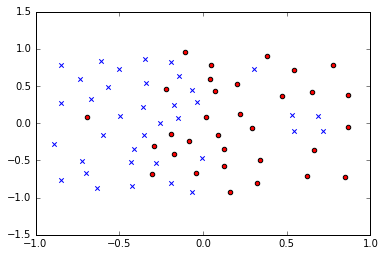

In [9]:
negative = all_data[all_data.outcome == 0]
positive = all_data[all_data.outcome == 1]
plt.scatter(negative.var1, negative.var2, c = 'b', marker = 'x')
plt.scatter(positive.var1, positive.var2, c = 'r', marker = 'o')

<h1> 3 - Doing LWLogisticR </h1>

In [10]:
LAMBDA = 0.0001

def sigmoid(z): #will take in a scalar or a vector!
    return 1 / (1 + np.e**(-z)) 

def hypothesis(theta, x):
    return sigmoid(np.dot(x, theta))

def gaussian(point1, point2, tau):
        return np.exp(- (np.linalg.norm(a-b)**2) / (2 * tau**2))

def getWeights(data, new_point, tau):
    assert (new_point.shape[0] == 1) #new point should be 1xn, where n is the number of features
    new_point_repeat = np.repeat(new_point, data.shape[0], axis = 0) #for a 2-D array, axis=0 == rows, axis=1 == columns    
    norm_squared = np.linalg.norm(data - new_point_repeat, axis = 1) ** 2
    weights = np.exp(-norm_squared / (2 * tau ** 2))
    return weights.reshape(len(weights), 1)
    
def lwlr(x_train, y_train, x, tau):
    x_train_aug = pandas.concat([pandas.Series(np.ones(len(x_train.index))), x_train], axis = 1)
    x_aug = np.concatenate([np.asarray([[1]]), x], axis = 1)
    
    theta_length = x_train_aug.shape[1] 
    theta = np.zeros([theta_length, 1]) #so, theta element of R^(n+1). Initializing at zero
    
    #I should definitely be using a more intelligent way to stop the alg. maybe once below it drops below a certain threshold
    for i in xrange(10):
        #derivative
        weights = getWeights(x_train_aug, x_aug, tau)
        z = weights * (y_train - hypothesis(theta, x_train_aug))
        deriv = np.dot(x_train_aug.transpose(), z) - LAMBDA * theta

        #hessian
        diags = -weights * hypothesis(theta, x_aug) * (1 - hypothesis(theta, x_aug))
        D = np.diag(diags[:, 0])
        H = np.dot(np.dot(x_train_aug.transpose(), D), x_train_aug) - LAMBDA * np.eye(x_train_aug.shape[1])

        theta_new = theta - np.dot(np.linalg.inv(H), deriv)
        
        dist = np.linalg.norm(theta_new - theta)
        #print "old theta: \n" + str(theta)
        #print "new theta: \n" + str(theta_new)
        #print "distance: " + str(dist)
        #print "***************"
        
        
        theta = theta_new
    
    return theta

In [11]:
#final_theta = lwlr(data, labels, np.asarray([[-0.347926, 0.862573]]), 1)

<h1> Let's plot the resulting classifiers </h1>

In [78]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

print "Current size:", fig_size
 
# Set figure width and height
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

Current size: [15.0, 15.0]


In [82]:
def plot_lwlr(data, labels, tau, res):
    pred = np.empty(shape = (res, res))

    x = np.zeros([1, 2])
    for i in xrange(1, res):
        if i % 15 == 0:
            print i
        for j in xrange(1, res):
            x[0][0] = (2*(i-1)/float(res-1)) - 1
            x[0][1] = (2*(j-1)/float(res-1)) - 1
            final_theta = lwlr(data, labels, x, tau)
            x_aug = np.concatenate([np.asarray([[1]]), x], axis = 1)
            pred[i][j] = hypothesis(final_theta, x_aug) 
            
            if pred[i][j] < 0.5:
                plt.scatter(x[0][0], x[0][1], c = 'b', marker = 'x')
            elif pred[i][j] > 0.5:
                plt.scatter(x[0][0], x[0][1], c = 'r', marker = 'o')
    
    pred_negative = pred[pred == 0]
    pred_positive = pred[pred == 1]
    #plt.scatter(negative.var1, negative.var2, c = 'b', marker = 'x')
    #plt.scatter(positive.var1, positive.var2, c = 'r', marker = 'o')
    
    
    return pred

In [ ]:
pred = plot_lwlr(data, labels, tau=1, res=200)